In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

%matplotlib inline

D:\Anaconda3(4.2.0)\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df =pd.read_csv("data/train.csv", parse_dates=['timestamp'])

In [4]:
train_df.build_year.value_counts()

2014.0        919
2015.0        824
0.0           530
2013.0        464
1970.0        418
1969.0        407
1968.0        389
1967.0        384
1965.0        378
2016.0        375
1.0           368
1972.0        360
1974.0        357
1971.0        352
1966.0        348
1960.0        344
1962.0        338
1973.0        333
1963.0        325
1964.0        315
1975.0        309
1961.0        297
1976.0        263
1977.0        260
2006.0        242
1979.0        236
1978.0        235
2008.0        234
2012.0        233
1980.0        226
             ... 
1936.0          5
1947.0          4
1924.0          3
1949.0          3
1914.0          3
1941.0          2
3.0             2
1943.0          2
1946.0          2
1860.0          2
1907.0          2
1896.0          2
1900.0          2
1876.0          1
1691.0          1
20.0            1
215.0           1
71.0            1
2018.0          1
4965.0          1
1920.0          1
1886.0          1
1895.0          1
1904.0          1
1905.0    

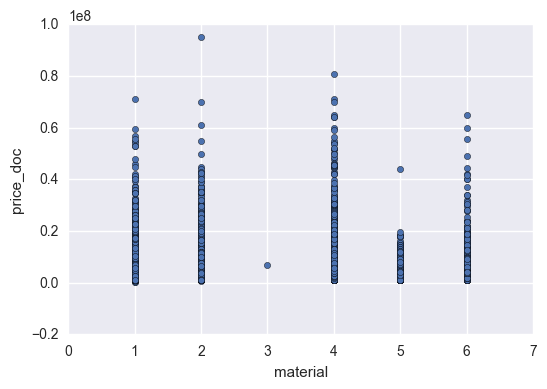

In [5]:
train_df.plot.scatter(x='material', y='price_doc')

In [3]:
train_df.product_type.value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [5]:
train_df.columns[0:100]

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part',
       'indust_part', 'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion',
       'incineration_raion', 'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion',
       'detention_facility_raion', 'full_all', 'male_f', 'female_f',
       'young_all', 'young_male', 'young_female

In [7]:
train_df.columns[100:200]

Index(['railroad_station_avto_km', 'railroad_station_avto_min',
       'ID_railroad_station_avto', 'public_transport_station_km',
       'public_transport_station_min_walk', 'water_km', 'water_1line',
       'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km',
       'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km',
       'ID_big_road2', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km',
       'ID_railroad_terminal', 'bus_terminal_avto_km', 'ID_bus_terminal',
       'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km',
       'power_transmission_line_km', 'thermal_power_plant_km', 'ts_km',
       'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km',
       'ice_rink_km', 'stadium_km', 'basketball_km', 'hospice_morgue_km',
       'detention_facility_km', 'public_healthcare_km', 'university_km',
       'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_s

In [8]:
train_df.columns[200:292]

Index(['prom_part_1500', 'office_count_1500', 'office_sqm_1500',
       'trc_count_1500', 'trc_sqm_1500', 'cafe_count_1500',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
       'cafe_avg_price_1500', 'cafe_count_1500_na_price',
       'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
       'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500',
       'cafe_count_1500_price_4000', 'cafe_count_1500_price_high',
       'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
       'leisure_count_1500', 'sport_count_1500', 'market_count_1500',
       'green_part_2000', 'prom_part_2000', 'office_count_2000',
       'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000',
       'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg',
       'cafe_avg_price_2000', 'cafe_count_2000_na_price',
       'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
       'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500',


In [ ]:
ind =train_df[(train_df.build_year <=1691) | (train_df.build_year >=2018)].index
by_df =train_df.drop(ind).sort_values(by=['build_year'])
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.countplot(x=by_df['build_year'])
ax.set(title='Distribution of build year')

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()
sns.regplot(x="build_year", y="price_doc", data=by_price, scatter=False, order=3, truncate=True)
plt.plot(by_price['build_year'], by_price['price_doc'], color='r')
ax.set(title='Mean price by year of build')

In [ ]:
by_price